# Lecture 6 - Design and Analysis of Machine Learning Experiments

# Overfitting

In previous lectures, we discussed **overfitting** and techniques that help avoid overfitting. They include:

1. **Collect more data:** As you have more and more data, it becomes more and more difficult to "memorize" the data and its noise. Often, more data translates to the ability to use a more complex model and avoid overfitting. However, generally, you need exponentially more data with increases to model complexity. So, there is a limit to how much this helps. If you have a very complex model, you need a huge training data set.

    * This is a direct implication of the **Curse of Dimensionality**.
    
2. **Cross-validation:** it can be used to determine which model parameters should be selected for the available data. Cross-validation partitions the training data into training and validation sets. The training set is used to find the parameters of the model and the validation set is used to evaluate the trained parameters and assess whether the model has overfitted.

    * To implement k-fold cross-validation you can make use of the function ```cross_val_score``` from the module ```cross_validation``` in the ```sklearn``` library.

One important aspect of model complexity is that the optimal model will generally depend on the size of your training data. Consider the example below as the result of fitting a polynomial regression model with a varying model order (or degree, in the x-axis).

<div><img src="figures/LearningCurve.png", width="500"><!div>

<center> (Figure 5-31 of "Python Data Science Handbook") </center>

The solid lines show the results of adding a few data samples to an original data set, while the fainter dashed lines show the results of an original data set. It is clear from the validation curve that the larger dataset can support a much more complicated model: the peak here is probably around a degree of 6, but even a degree-20 model is not seriously overfitting the data—the validation and training scores remain very close.

Thus we see that the behavior of the validation curve has not one, but two, important inputs: the model complexity and the number of training points. It is often useful to explore the behavior of the model as a function of the number of training points, which we can do by using increasingly larger subsets of the data to fit our model. A plot of the training/validation score with respect to the size of the training set is known as a <span style="color:blue">**learning curve**</span>. 

3. **Regularization:** Regularization methods add a penalty term to the objective function to discourage overfitting. These penalty terms encourage the parameters to have small values, limiting the ability to overfit. These penalty terms are a way to trade-off between error and complexity.

# The Curse of Dimensionality

* We need exponentially more data as we go to higher and higher dimensions.

* We need to be careful choosing a model as that choice "injects" what we want the data to look like or follow a specific behavior.

* Always employ the **Occam's Razor** principle: the simplest model that works for our data is usually the most appropriate and sufficient. Model simplicity can mean different things, but we can consider model order. 

* When we are in a high-dimensional input space (such as images), much of that space is empty. The input data can be represented in only a few *degrees of freedom* of variability. We say that the data in *embedded* in a **manifold** of equal dimensionaly as the degrees of freedom (which is drastically smaller than the input space dimensionality).

* And, again, intuition or assumptions don't always hold in higher dimensions.
    * Try to think of the problem: When we draw from a univariate Gaussian, where are the data samples most likely coming from? Where are data samples most likely coming from if we draw them from a high-dimensional multivariate Gaussian?

# Classification

* So far, we have focused on regression. We will begin to discuss classification.

* The goal in **classification** is to take an input vector, **X**, and assign it to one of $K$ discrete classes.  

* Usually this is done by learning **decision boundaries** or **decision surfaces** that divide up the feature space and assign a class to each partition of the feature space created by the decision boundary. 

* Data whose classes can be separated perfectly with a linear decision surface (i.e., a line in 2-D, a plane in 3-D, etc) are called **linearly separable**. These are the easiest classification problems to address. 

    * There are *many* classifiers in the machine learning literature. We will cover a few in this class.

* You can **encode class labels** in a number of ways: binary vectors, class number, etc. Different encodings make sense in different situations. But you want to select carefully - depending on the algorithm you use, it can make a difference. 

## Example

Let's take a look at the [Iris Data Set](https://archive.ics.uci.edu/ml/datasets/Iris) available at the UCI Repository.

We can also download this dataset in the form of a ```Pandas``` DataFrame using the ```Seaborn``` library:

**IRIS SETOSA**
![Iris Setosa](https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/330px-Kosaciec_szczecinkowaty_Iris_setosa.jpg)

**IRIS VERSICOLOR**
![Iris Versicolor](https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/330px-Iris_versicolor_3.jpg)

**IRIS VIRGINICA**
![Iris Virginica](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/330px-Iris_virginica.jpg)

IRIS Data Set has 150 examples with 4 features of 3 types of iris plants.

* Samples: 150

* Features: 4 (sepal length in cm, sepal width in cm, petal length in cm, petal width in cm)

* Classes: 3 (setosa - 0, versicolor - 1 and virginica - 2)

In [14]:
import seaborn as sns

iris = sns.load_dataset('iris')

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


The firt step on dealing with *any* data set is **data visualization**. 

There are many plotting schemes that can be employed but since we are working with features, we want to assess each feature *predictive value*. To do this, we wish to analyze the behvior between pairs of features:

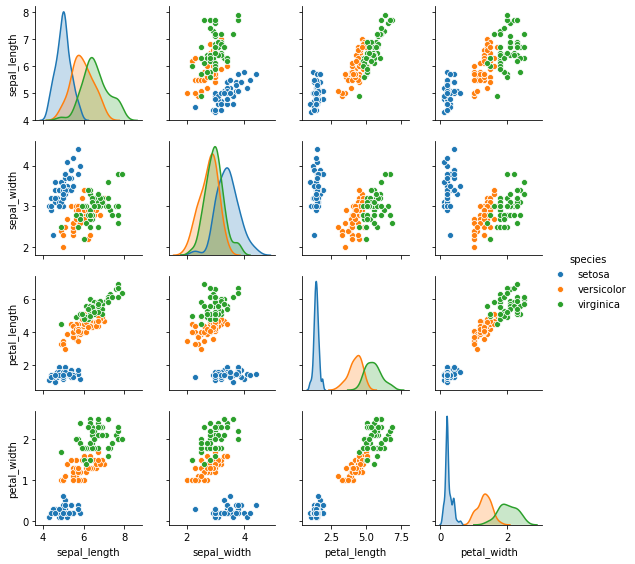

In [19]:
sns.pairplot(iris, hue='species', height=2);

* What can you oberve from this plot?

In [22]:
X = iris.drop('species', axis=1)
X.shape

(150, 4)

In [25]:
t = iris['species']
t.shape

(150,)

In [43]:
X_setosa = np.array(iris[iris['species']=='setosa'].drop('species',axis=1))

# X_setosa

* What is $\mathbf{X}$? Data or feature matrix?

* How can we compute the auto-correlation matrix?

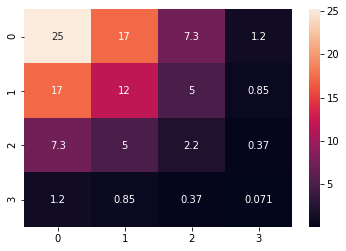

In [64]:
sns.heatmap(X_setosa.T@X_setosa/50, annot=True);

* What should we do to limit the value of any particular feature simply due to the range of values it takes?

<!-- **Data Normalization:** for every feature $f_i$ perform the following normalization

$$f_i \leftarrow \frac{f_i - \mu_{f_i}}{\sigma_{f_i}}$$

where $\mu_{f_i}$ is the mean of feature $f_i$ and $\sigma_{f_i}$ is the standard deviation of the feature $f_i$. -->

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_setosa)

print(scaler.mean_)
print(scaler.var_)

[5.006 3.428 1.462 0.246]
[0.121764 0.140816 0.029556 0.010884]


In [58]:
import numpy as np

X_setosa_norm = scaler.transform(X_setosa)
print(np.mean(X_setosa_norm, axis=0),np.std(X_setosa_norm, axis=0))

[-6.76542156e-16  1.54321000e-16 -1.16906484e-15  3.41948692e-16] [1. 1. 1. 1.]


,sepal_length,sepal_width,petal_length,petal_width,species


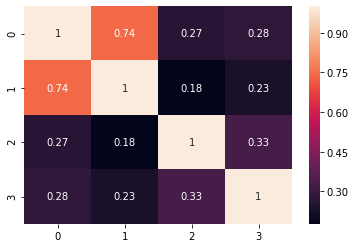

In [63]:
sns.heatmap(X_setosa_norm.T@X_setosa_norm/len(X_setosa_norm), annot=True);

iris.head(n=0)

* How can we assess the *predictive value* of each feature?

# Feature Engineering 

One of the important steps in using machine learning in practice is feature engineering - that is, taking whatever information you have about your problem and turning it into numbers that you can use to build your feature matrix.

A few common examples of feature engineering tasks: features for representing categorical data, features for representing text, and features for representing images. Additionally, we can derive features for increasing model complexity and imputation of missing data.

1. **Categorical Features**

One common type of non-numerical data is categorical data. For example, imagine you are exploring some data on house pets, and along with numerical features like total number of pets and weight of the pet, you also have the type of pet information (e.g., "dog", "cat", "bird"). You might be tempted to encode this data with a straightforward numerical mapping: $\{\text{dog: }1,\text{ cat: }2,\text{ bird: }3\}$. This is called **integer encoding**.

It turns out that this is not generally a useful approach as you are *encoding* an implicit algebraic quantities. Thus such mapping would imply, for example, that dog < cat < bird, or even that bird-cat = dog, which does not make sense. 

In this case, one proven technique is to use **one-hot encoding**, which effectively creates extra columns indicating the presence or absence of a category with a value of 1 or 0, respectively. In this example, dog would be encoded as $[1,0,0]$, cat as $[0,1,0]$ and bird as $[0,0,1]$.

There is one clear disadvantage of this approach: if your category has many possible values, this can greatly increase the size of your dataset.

Another approach to counteract on this disadvantage is to use a **binary encoding** (or some other base).

2. **Derived Features**

Another useful type of feature is one that is mathematically derived from some input features. We saw an example of this when we constructed polynomial features from our input data. We saw that we could convert a linear regression into a polynomial regression not by changing the model, but by transforming the input! This is also sometimes known as *basis function regression*.

3. **Imputation of Missing Data**

Another common need in feature engineering is handling missing data. When applying a typical machine learning model to such data, we will need to first replace such missing data with some appropriate fill value. This is known as imputation of missing values, and strategies range from simple (e.g., replacing missing values with the mean of the column) to sophisticated (e.g., using matrix completion or a robust model to handle such data). The sophisticated approaches tend to be very application-specific, and we won’t dive into them here.

4. **Image Features**

Another common need is to suitably encode images for machine learning analysis. The simplest approach is simply using the pixel values themselves. But depending on the application, such approaches may not be optimal. We will study a comprehensive summary of feature extraction techniques for images.

5. And many others... 

Read Section 5.4 **"Feature Engineering"** from Python Data Science Handbook textbook, available online [here](https://jakevdp.github.io/PythonDataScienceHandbook/05.04-feature-engineering.html).

# Typical Workflow of a Supervised Learning System

1. **Data Acquisition**

One of the most (if not the one) crucial steps in building a supervised learning system. The collected data will have a tremendous impact on the subsequent steps of the machine learning system including: feature extraction, model selection and model validation.

2. **Feature Extraction**

Sometimes the data you are working with was already collected and features were extracted, so you will have little control of the first two steps, other than some feature engineering you may wish to apply.
When you do have control of your data, feature extraction will also be an important step. We will discuss more details on this broad topic, specifically for image data.

3. **Pre-processing**

In this stage you will prepare the data to be *fed* into the system. Data pre-processing include **normalization**. This can be a big difference in the results. Always normalize the data.

4. **Model Selection**

Selecting the model can be influenced by any information you may have about the data.

5. **Hyperparameter Tuning**

In this step you will be mostly trying to find the set of parameters that fit the data the best but avoid overfitting. This includes implementing strategies such as: regularization, k-fold cross-validation and plotting learning curves.

There are useful modules from the ```scikit-learn``` library that you should take some time reading and learning about: from the module ```preprocessing```, read about function ```StandardScaler```; from the module ```cross_validation```, read about function ```cross_val_score```; from module ```learning_curve```, read about function ```learning_curve```; from module ```grid_search```, read about function ```GridSearchCV```. 

6. **Model Evaluation**

The last step of a supervised learning system is to report on the model's performance. This may include any statistical measures such as: mean average error, Quantile-Quantile (Q-Q) plot and hypothesis tests. If you want to answer the question "Is A a more accurate algorithm than B?", this becomes the hypothesis "Can we say that the average error of learners trained by A is significantly lower than the average error of learners trained by B?". So we can design statistical tests and measures to evaluate the models.

But you can also look at different performance metrics. This next section will discuss different performance metrics.

# Performance Evaluation Metrics

A key step in supervised learning system workflow is determining an *appropriate* performance evaluation metric.

**Evaluation metrics** help us to estimate how well our model is trained and it is important to pick a metric that matches our overall goal for the system.

Some common evaluation metrics include precision, recall, receiver operating curves, and confusion matrices.

## Classification Accuracy and Error

Classification accuracy and e the number of correct predictions made as a ratio of all predictions made.

* **Classification accuracy** is defined as the number of correctly classified samples divided by all samples:

$$\text{accuracy} = \frac{N_{\text{corr}}}{N}$$

where $N_{\text{corr}}$ is the number of correct classified samples and $N$ is the total number of samples.

* **Classification error** is defined as the number of incorrectly classified samples divided by all samples:

$$\text{error} = \frac{N_{\text{miss}}}{N}$$

where $N_{\text{miss}}$ is the number of misclassified samples and $N$ is the total number of samples.

* Classification accuracy is the most common evaluation metric for classification problems, it is also the most misused. It is really only suitable when there are an equal number of observations in each class (which is rarely the case) and that all predictions and prediction errors are equally important, which is often not the case.

### Example 1: Fish Dataset
Suppose there is a 3-class classification problem, in which we would like to classify each training sample (a fish) to one of the three classes (A = salmon or B = sea bass or C = cod).

Let's assume there are 150 samples, including 30 salmon, 40 sea bass and 80 cod. Suppose our model misclassifies 4 salmon, 2 sea bass and 5 cod.

* The classification accuracy (ACC) of our binary classification model is calculated as:

$$\text{ACC} = \frac{26 + 38 + 75}{30 + 40 + 80} = \frac{139}{150} \approx 92.7 \%$$

* The prediction error is calculated as:

$$\text{error} = \frac{4 + 2 + 5}{30+40+80} = \frac{11}{150} \approx 7.3 \%$$

* The classification accuracy doesn't really give an insight on which class is being misclassified the most.

## Confusion Matrix

A confusion matrix summarizes the classification accuracy across several classes. It shows the ways in which the classification model is confused when it makes predictions, allowing visualization of the performance of our algorithm. 

Generally, each row represents the instances of a actual class while each column represents the instances in an predicted class.

If the classifier is trained to distinguish between salmon, sea bass and cod. We can summarize the prediction result in the confusion matrix as follows:

|actual/predict|    salmon    |    sea bass  |      cod     |
|--------------|--------------|--------------|--------------|
|    salmon    |      26      |       2      |       2      |
|    sea bass  |       2      |       38     |       3      |
|      cod     |       2      |       3      |       75     |


In this confusion matrix, of the 30 salmons (row 1), the classifier predicted that 26 are labeled salmon correctly, 2 are wrongly labeled as sea bass, and another 2 are wrongly labeled as cod. 

All correct predictions are located in the diagonal of the table. So it is easy to visually inspect the table for prediction errors, as they will be represented by values outside the diagonal.

## Precision, Recall & Fall-Out

We are often looking to discriminate between observations with a specific binary outcome, for example, event or no event. In our example, the fish company would like to produce salmon can but the harvest contains all three species. In this way,
we can assign the event (salmon) as "positive" and no-event (not salmon) as "negative".

The confusion matrix for this two-class classification problem is:

|actual/predicted|    salmon    |  non-salmon  |
|----------------|--------------|--------------|
|     salmon     |      26      |       4      |
|   non-salmon   |       7      |      113     |

* **True positive (TP):** correctly predicting positive events
* **False positive (FP):** incorrectly calling positive to a negative event
* **True negative (TN):** correctly predicting negative events
* **False negative (FN):** incorrectly labeling negative to a positive event

*In this salmon/non-salmon classification problem, what are the TP, FP, TN, FN values?*

|actual/predicted|   Positive   |   Negative   |
|----------------|--------------|--------------|
|    Positive    |      TP      |      FN      |
|    Negative    |      FP      |      TN      |

* **Precision**, also called Positive Predictive Value (PPV), is the performance of detection

$$\text{Precision} = \text{PPV} = \frac{TP}{TP + FP}$$

* **Recall**, also called True Positive Rate (TPR) or Sensitivity, is the probability of detection

$$\text{Recall} = \text{TPR} = \text{Sensitivity} = \frac{TP}{TP + FN}$$

* **Fall-out**, also called False Positive Rate (FPR), is the probability of false alarm

$$\text{Fall-out} = \text{FPR} = \frac{FP}{FP + TN}$$

* **Specificity**, also called True Negative Rate (TNR), is the probability of negative events detection

$$\text{Specificity} = \frac{TN}{TN + FP}$$

<!--* **F1-score**, also called F-score or F-measure, is a measure of a model's accuracy. It considers both the precision and the recall-->

<!--$$\text{F1-score} = 2\times\frac{\text{Precision}\times \text{Recall}}{\text{Precision} + \text{Recall}}$$-->

* Learn about many other measures on the [Wikipedia page](https://en.wikipedia.org/wiki/Sensitivity_and_specificity) and [Scikit-Learn Metrics Module](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

## ROC Curves

**Receiver Operating Characteristic (ROC) curve** is the plot between the true positive rate (TPR) and the false positive rate (FPR), where the TPR is defined as the y-axis and FPR is defined as the x-axis.

* ROC curves were first developed for RADAR systems, hence the name.

* Given a binary classifier and its threshold, the (x,y) coordinates of ROC space can be calculated from all the prediction result. You trace out a ROC curve by varying the threshold to get all of the points on the ROC.

* The diagonal between (0,0) and (1,1) separates the ROC space into two areas, which are left up area and right bottom area. The points above the diagonal represent good classification (better than random guess) which below the diagonal represent bad classification (worse than random guess).

* *What is the perfect prediction point in a ROC curve?*


### Area Under the Curve (AUC)

**Area Under Curve (AUC)** is a common measure of how good a test is. It is simply the area under the ROC curve. Random guessing can achieve the diagonal line, so the minimum AUC is 1/2. The maximum AUC is 1, which is achieved by a test that is always right; the ROC curve is along the left and top axes.

### Example

1. Suppose you have a target detection task that you would like to evaluate using ROC curve analysis. You emplaced 10 targets and collected aerial hyperspectral imagery over 10 $km^2$. Then, suppose you ran a set of alarm generation and target detection algorithms over the collecte data. Your algorithms produced the following list of alarm confidence values. You have already matched each of these alarms to a location on the ground and compared them with you ground truth. True targets, based on your ground truth, are marked with a "T" in the second column. Draw the associated ROC cure for these results.

|  0.91  |  0.90  |  0.80  |  0.79  |  0.77  |  0.75  |  0.50  |  0.40  |  0.39  |  0.38  |  0.37  |  0.25  |  0.10  |  0.09  |  0.01  |
|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
|   T    |   T    |        |   T    |        |        |        |   T    |        |        |        |        |        |   T    |        |


2. Suppose you were segmenting a data set into three classes (e.g., vegetation, man-made materials, sand) and wanted to evaluate your results. Would sing a ROC curve be an appropriate method for evaluation? Why or why not?

* Check the list of performance evaluation metrics in the scikit-learn module called "metrics". Find it [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

# Reading Assignment
 
* Chapter 6 **"Learning Best Practices for Model Evaluation and Hyperparameter Tuning"** from Python Machine Learning textbook

* Section 5.3 **"Hyperparameters and Model Validation"** from Python Data Science Handbook textbook, available online [here](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html)

* Section 5.4 **"Feature Engineering"** from Python Data Science Handbook textbook, available online [here](https://jakevdp.github.io/PythonDataScienceHandbook/05.04-feature-engineering.html)